In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Dosya Okuma

In [42]:
oasis = pd.read_csv("oasis.csv")

In [43]:
oasis

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [44]:
### Group -------> Demented, Non-demented veya Converted sınıfları
### Visit -------> Hastanın Ziyaret Sayısı
### MR Delay ----> Delay Magnetic Resonance(MR) gecikmesi, görüntü alımı yapılmadan önce verilen gecikme süresi
### M/F ---------> Hastanın Cinsiyeti
### Age ---------> Hastanın Tarama Sırasındaki Yaşı
### EDUC --------> Hastanın Eğitim Hayatı(yıl)
### SES ---------> Hastanın Sosyo Ekonomik Durumu (1-5)
### MMSE --------> Mini Mental Durum Testi Puanı
### CDR ---------> Klinik Demans Derecelendirmesi
### eTIV --------> Deneysel Toplam Kafa İçi Hacmi
### nWBV --------> Normalize Edilmiş Tüm Beyin Hacmi
### ASF ---------> Atlas Ölçeklendirme Faktörü

### Parametre olarak alınmayanlar;
### Subject ID --> Hastanın kimlik numarası
### MR ID -------> Her hastanın MR kimlik numarası
### Hand --------> Sağ el yada Sol el kullanma alışkanlığı (tüm örnekler Sağ el kullanmaktadır)

############### Mini Mental Durum Testi Puanı ###############
###  MMSE      Demans Skoru                               ###
### 25-30 --> Sağlıklı (Demans Değil)                     ###
### 21-24 --> Erken aşama Alzheimer (Very Mild Alzheimer) ###
### 10-20 --> Orta aşama Alzheimer (Mild Alzheimer)       ###
###  0-10 --> İleri aşama (Modarate Alzheimer)            ###
#############################################################

############## Klinik Demans Derecelendirmesi ###############
### CDR      Demans Skoru                                 ###
###  0  --> Sağlıklı (Demans Değil)                       ###
### 0,5 --> Erken aşama Alzheimer (Very Mild Alzheimer)   ###
###  1  --> Orta aşama Alzheimer (Mild Alzheimer)         ###
###  2  --> İleri aşama (Modarate Alzheimer)              ###
###  3  --> Şiddetli (Son) aşama (Severe Alzheimer)       ###
#############################################################

# Veri Analizi

In [45]:
# Analiz
oasis.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


### Veri Farklılıkları

In [46]:
# Ne kadar farklı değer var
for i in list(oasis.columns):
    print(f"{i} -> {oasis[i].value_counts().shape[0]}")

Subject ID -> 150
MRI ID -> 373
Group -> 3
Visit -> 5
MR Delay -> 201
M/F -> 2
Hand -> 1
Age -> 39
EDUC -> 12
SES -> 5
MMSE -> 18
CDR -> 4
eTIV -> 286
nWBV -> 136
ASF -> 265


### Null Değerler

In [47]:
# Ne kadar null değer var
oasis.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

# Null İşlemler

In [48]:
oasis.head(15)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


In [49]:
# null kayıtları dropla
oasis.dropna().head(15)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033
13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,2.0,30.0,0.0,1272,0.698,1.380
14,OAS2_0008,OAS2_0008_MR2,Nondemented,2,742,F,R,95,14,2.0,29.0,0.0,1257,0.703,1.396
15,OAS2_0009,OAS2_0009_MR1,Demented,1,0,M,R,68,12,2.0,27.0,0.5,1457,0.806,1.205


In [50]:
# null kayıtlara ortalama değer ver
oasis.fillna(value= {"SES": oasis["SES"].mean()}).head(15)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.460452,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.000000,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.000000,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.000000,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.000000,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.000000,30.0,0.0,1699,0.705,1.033


### Aykırı Değerler

In [51]:
# Veri setini yükle
oasis = pd.read_csv("oasis.csv")

In [52]:
# Veri tiplerini kontrol et
print(oasis.dtypes)

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object


In [53]:
# Sayısal sütunları seç
numeric_columns = oasis.select_dtypes(include=['float64', 'int64']).columns

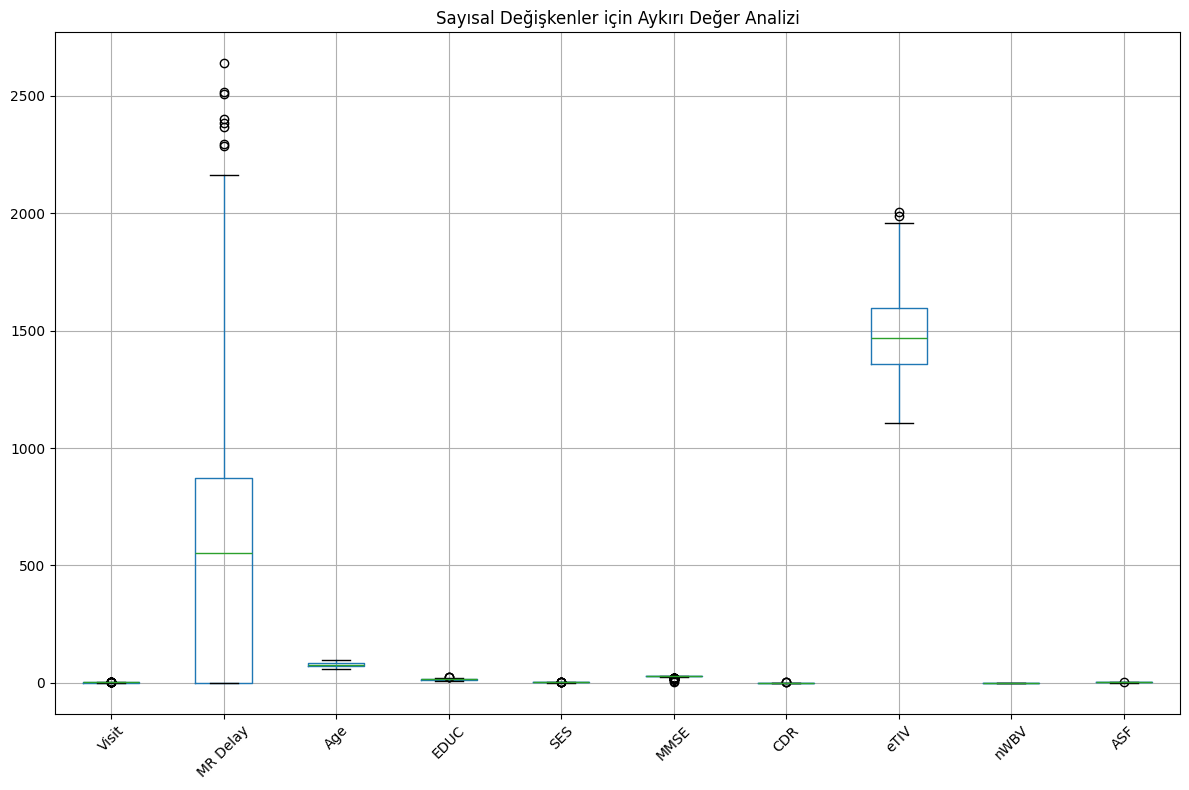

In [54]:
# Sayısal sütunlar için kutu grafiği oluşturma
plt.figure(figsize=(12, 8))
oasis[numeric_columns].boxplot()
plt.xticks(rotation=45)
plt.title("Sayısal Değişkenler için Aykırı Değer Analizi")
plt.tight_layout()
plt.show()

In [55]:
for col in numeric_columns:
    Q1 = oasis[col].quantile(0.25)
    Q3 = oasis[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Alt ve üst sınırları hesaplama
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Aykırı değerleri bulma
    outliers = oasis[(oasis[col] < lower_limit) | (oasis[col] > upper_limit)][col]
    
    if len(outliers) > 0:
        print(f"\n{col} sütunundaki aykırı değerler:")
        print(f"Alt sınır: {lower_limit:.2f}")
        print(f"Üst sınır: {upper_limit:.2f}")
        print(f"Aykırı değer sayısı: {len(outliers)}")
        print("Aykırı değerler:")
        print(outliers.head())

# Veri tiplerini görüntüleme
print("\nVeri seti sütunlarının tipleri:")
print(oasis.dtypes)


Visit sütunundaki aykırı değerler:
Alt sınır: -0.50
Üst sınır: 3.50
Aykırı değer sayısı: 21
Aykırı değerler:
12    4
31    4
32    5
35    4
50    4
Name: Visit, dtype: int64

MR Delay sütunundaki aykırı değerler:
Alt sınır: -1309.50
Üst sınır: 2182.50
Aykırı değer sayısı: 8
Aykırı değerler:
32     2400
71     2369
75     2508
153    2386
159    2288
Name: MR Delay, dtype: int64

EDUC sütunundaki aykırı değerler:
Alt sınır: 6.00
Üst sınır: 22.00
Aykırı değer sayısı: 3
Aykırı değerler:
107    23
108    23
109    23
Name: EDUC, dtype: int64

SES sütunundaki aykırı değerler:
Alt sınır: 0.50
Üst sınır: 4.50
Aykırı değer sayısı: 7
Aykırı değerler:
136    5.0
137    5.0
138    5.0
161    5.0
162    5.0
Name: SES, dtype: float64

MMSE sütunundaki aykırı değerler:
Alt sınır: 22.50
Üst sınır: 34.50
Aykırı değer sayısı: 42
Aykırı değerler:
4     22.0
25    21.0
26    16.0
43    21.0
44    21.0
Name: MMSE, dtype: float64

CDR sütunundaki aykırı değerler:
Alt sınır: -0.75
Üst sınır: 1.25
Aykırı d

# Veri Görselleştirme

Text(0.5, 1.0, 'Gurup dağılımı')

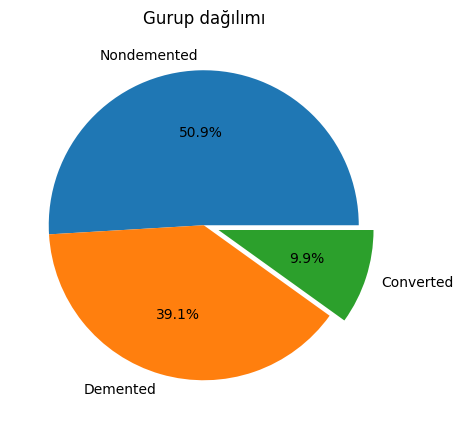

In [56]:
director_count = oasis["Group"].str.split(expand=True).stack().value_counts()
explode = [0,0,0.1]

plt.figure(figsize=(5,8))
plt.pie(director_count, labels=director_count.index, autopct="%1.1f%%", explode = explode)

plt.title("Gurup dağılımı")

### Histogram Tablosu

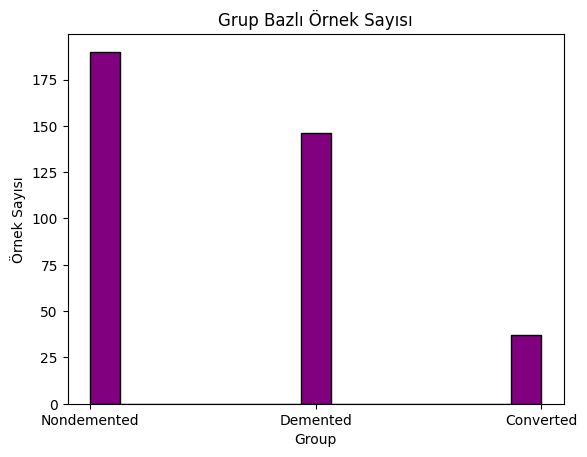

In [57]:
plt.hist(oasis["Group"], bins = 15, color= "purple", edgecolor= "black")
plt.xlabel("Group")
plt.ylabel("Örnek Sayısı")
plt.title( "Grup Bazlı Örnek Sayısı")
plt.show()

# plt.xticks(rotation = 0)
# plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

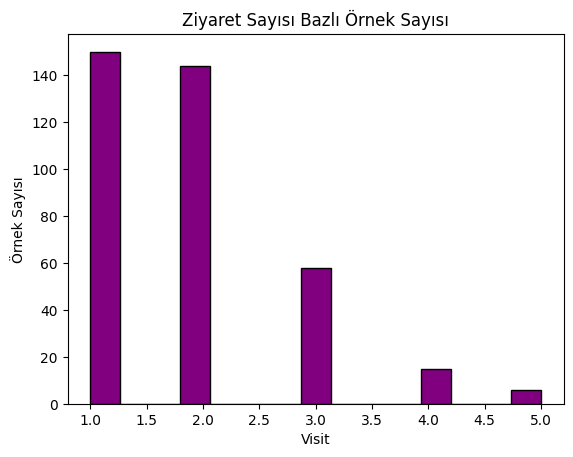

In [58]:
plt.hist(oasis["Visit"], bins = 15, color= "purple", edgecolor= "black")
plt.xlabel("Visit")
plt.ylabel("Örnek Sayısı")
plt.title( "Ziyaret Sayısı Bazlı Örnek Sayısı")
plt.show()

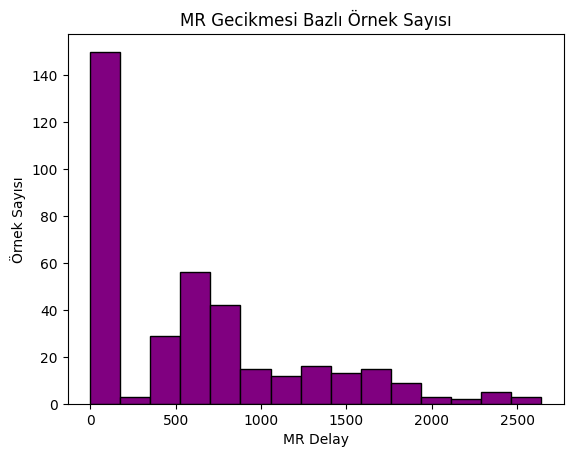

In [59]:
plt.hist(oasis["MR Delay"], bins = 15, color= "purple", edgecolor= "black")
plt.xlabel("MR Delay")
plt.ylabel("Örnek Sayısı")
plt.title( "MR Gecikmesi Bazlı Örnek Sayısı")
plt.show()

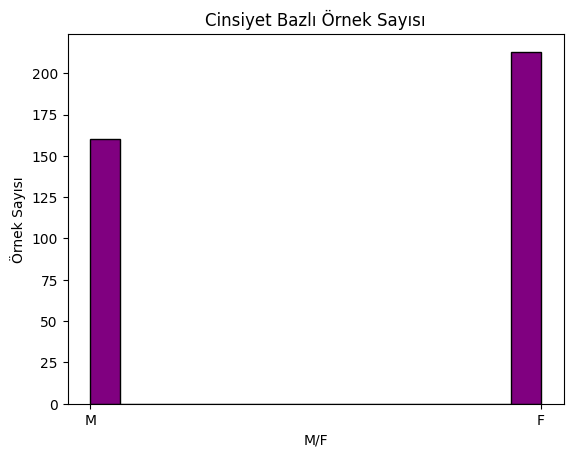

In [60]:
plt.hist(oasis["M/F"], bins = 15, color= "purple", edgecolor= "black")
plt.xlabel("M/F")
plt.ylabel("Örnek Sayısı")
plt.title( "Cinsiyet Bazlı Örnek Sayısı")
plt.show()

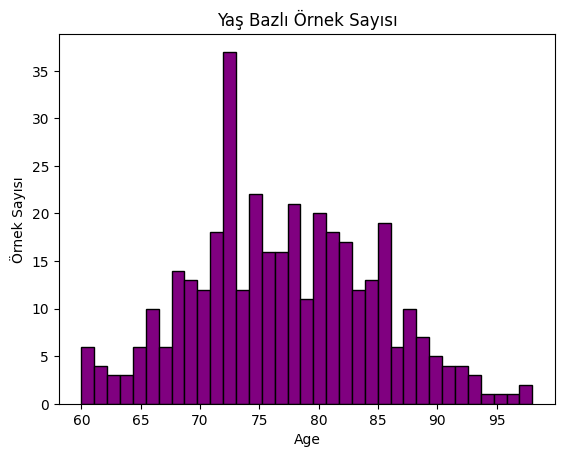

In [61]:
plt.hist(oasis["Age"], bins = 35, color= "purple", edgecolor= "black")
plt.xlabel("Age")
plt.ylabel("Örnek Sayısı")
plt.title( "Yaş Bazlı Örnek Sayısı")
plt.show()

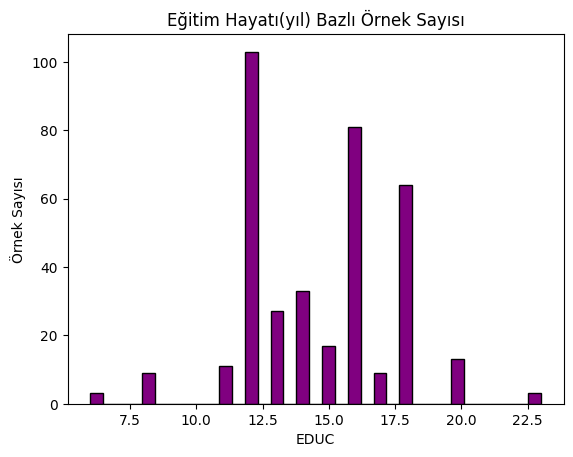

In [62]:
plt.hist(oasis["EDUC"], bins = 35, color= "purple", edgecolor= "black")
plt.xlabel("EDUC")
plt.ylabel("Örnek Sayısı")
plt.title( "Eğitim Hayatı(yıl) Bazlı Örnek Sayısı")
plt.show()

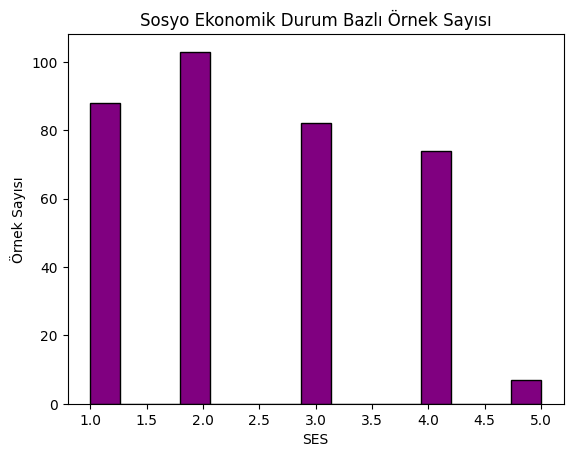

In [63]:
plt.hist(oasis["SES"], bins = 15, color= "purple", edgecolor= "black")
plt.xlabel("SES")
plt.ylabel("Örnek Sayısı")
plt.title( "Sosyo Ekonomik Durum Bazlı Örnek Sayısı")
plt.show()

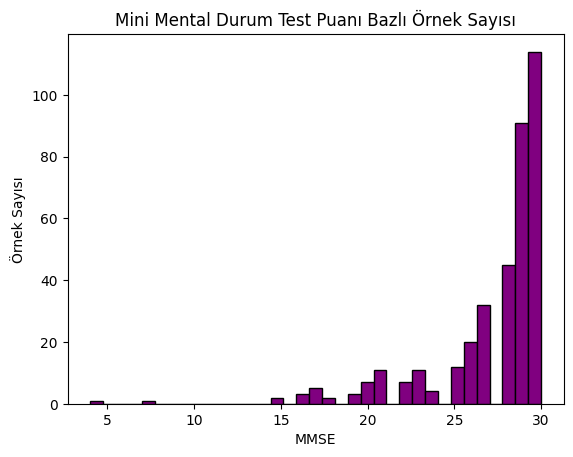

In [64]:
plt.hist(oasis["MMSE"], bins = 35, color= "purple", edgecolor= "black")
plt.xlabel("MMSE")
plt.ylabel("Örnek Sayısı")
plt.title( "Mini Mental Durum Test Puanı Bazlı Örnek Sayısı")
plt.show()

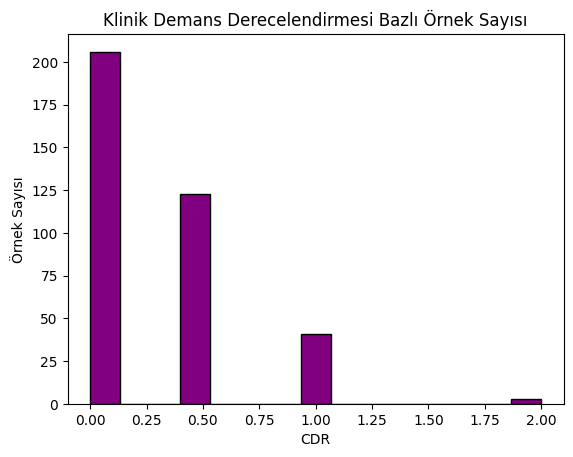

In [65]:
plt.hist(oasis["CDR"], bins = 15, color= "purple", edgecolor= "black")
plt.xlabel("CDR")
plt.ylabel("Örnek Sayısı")
plt.title( "Klinik Demans Derecelendirmesi Bazlı Örnek Sayısı")
plt.show()

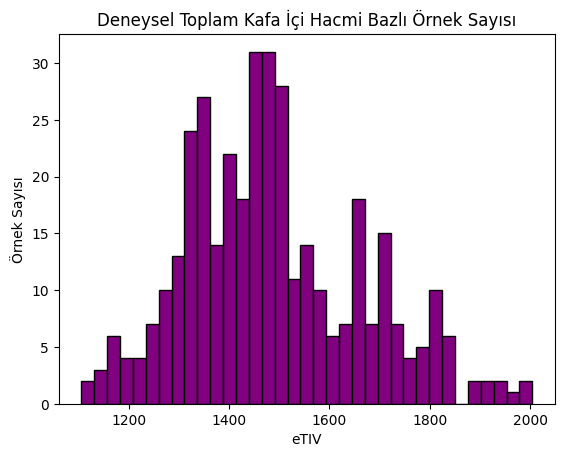

In [66]:
plt.hist(oasis["eTIV"], bins = 35, color= "purple", edgecolor= "black")
plt.xlabel("eTIV")
plt.ylabel("Örnek Sayısı")
plt.title( "Deneysel Toplam Kafa İçi Hacmi Bazlı Örnek Sayısı")
plt.show()

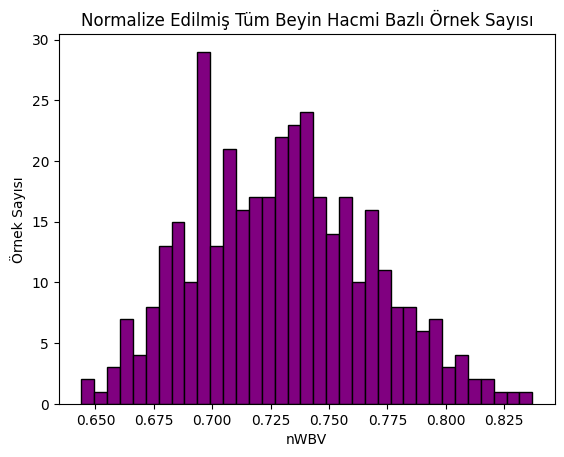

In [67]:
plt.hist(oasis["nWBV"], bins = 35, color= "purple", edgecolor= "black")
plt.xlabel("nWBV")
plt.ylabel("Örnek Sayısı")
plt.title( "Normalize Edilmiş Tüm Beyin Hacmi Bazlı Örnek Sayısı")
plt.show()

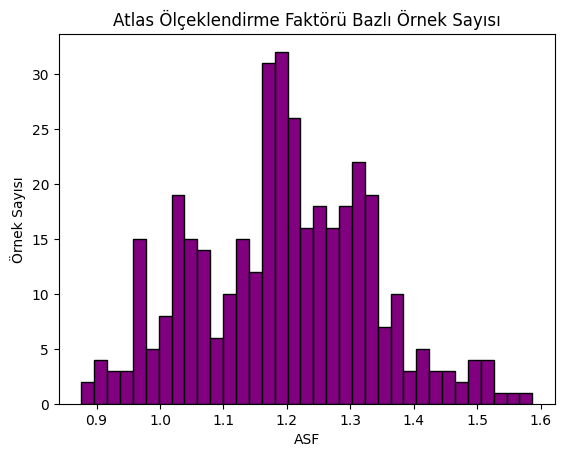

In [68]:
plt.hist(oasis["ASF"], bins = 35, color= "purple", edgecolor= "black")
plt.xlabel("ASF")
plt.ylabel("Örnek Sayısı")
plt.title( "Atlas Ölçeklendirme Faktörü Bazlı Örnek Sayısı")
plt.show()

### Scatter Tablosu

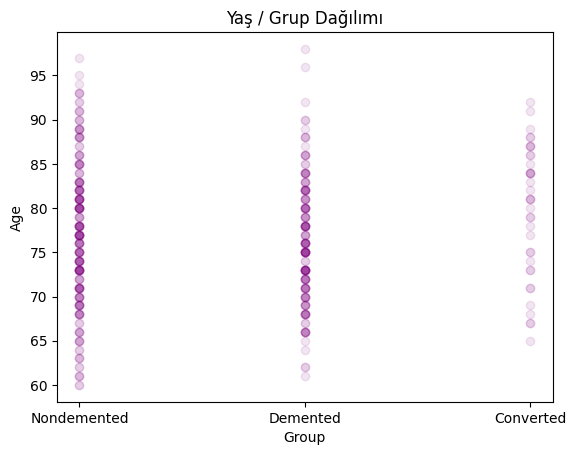

In [69]:
plt.scatter(oasis["Group"], oasis["Age"], color="purple", alpha= 0.1)
plt.title("Yaş / Grup Dağılımı")
plt.xlabel('Group')
plt.ylabel('Age')
# plt.grid()
plt.show()

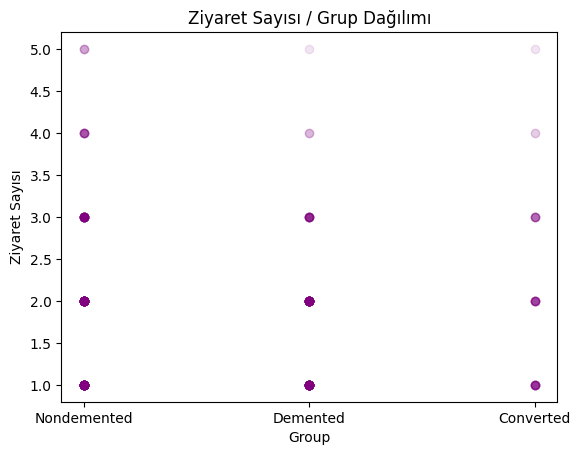

In [70]:
plt.scatter(oasis["Group"], oasis["Visit"], color="purple", alpha= 0.1)
plt.title("Ziyaret Sayısı / Grup Dağılımı")
plt.xlabel('Group')
plt.ylabel('Ziyaret Sayısı')
plt.show()

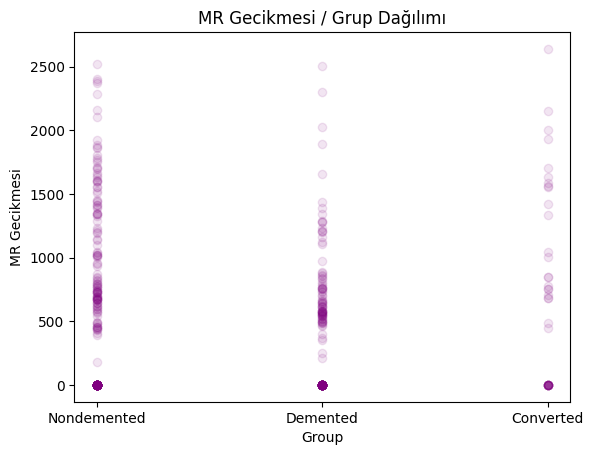

In [71]:
plt.scatter(oasis["Group"], oasis["MR Delay"], color="purple", alpha= 0.1)
plt.title("MR Gecikmesi / Grup Dağılımı")
plt.xlabel('Group')
plt.ylabel('MR Gecikmesi')
plt.show()

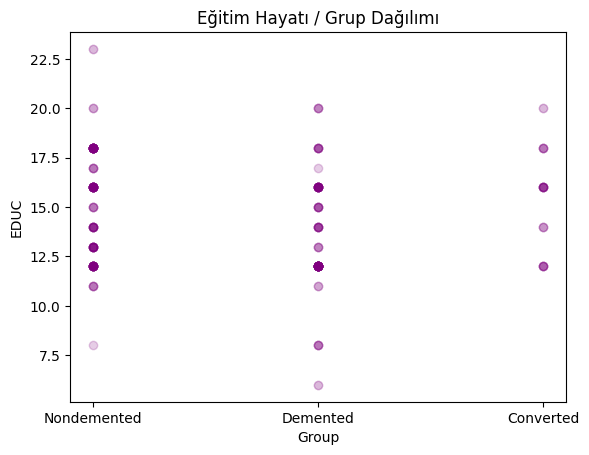

In [72]:
plt.scatter(oasis["Group"], oasis["EDUC"], color="purple", alpha= 0.1)
plt.title("Eğitim Hayatı / Grup Dağılımı")
plt.xlabel('Group')
plt.ylabel('EDUC')
plt.show()

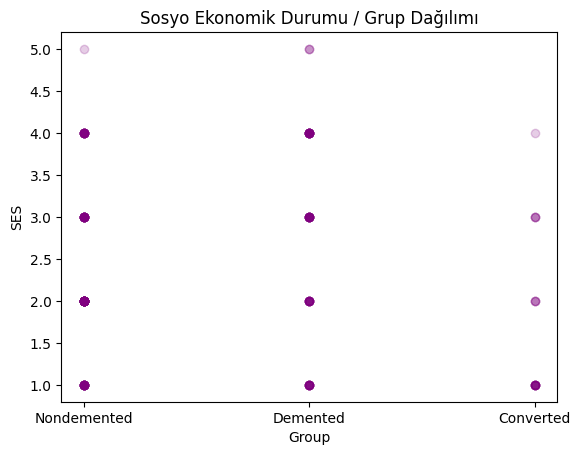

In [73]:
plt.scatter(oasis["Group"], oasis["SES"], color="purple", alpha= 0.1)
plt.title("Sosyo Ekonomik Durumu / Grup Dağılımı")
plt.xlabel('Group')
plt.ylabel('SES')
plt.show()

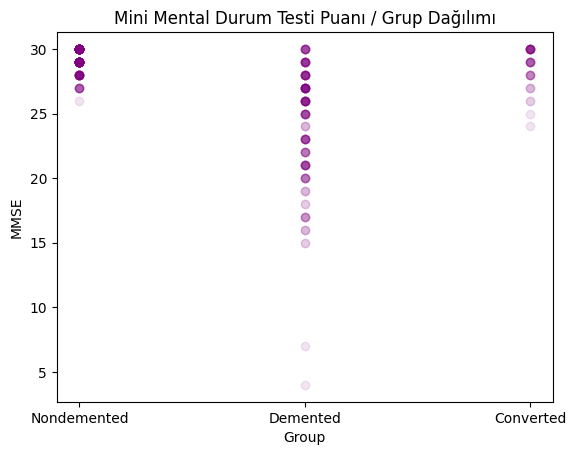

In [74]:
plt.scatter(oasis["Group"], oasis["MMSE"], color="purple", alpha= 0.1)
plt.title("Mini Mental Durum Testi Puanı / Grup Dağılımı")
plt.xlabel('Group')
plt.ylabel('MMSE')
plt.show()

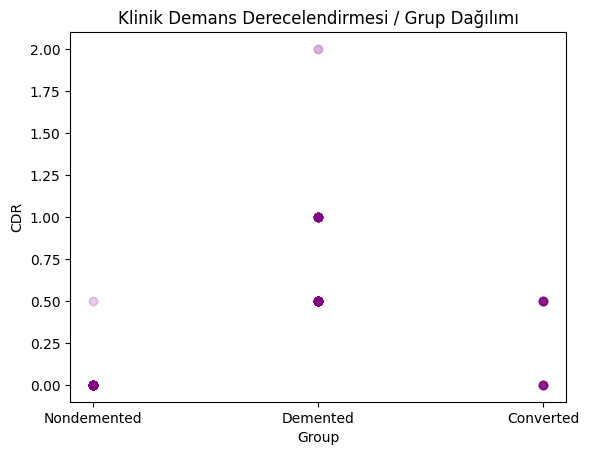

In [75]:
plt.scatter(oasis["Group"], oasis["CDR"], color="purple", alpha= 0.1)
plt.title("Klinik Demans Derecelendirmesi / Grup Dağılımı")
plt.xlabel('Group')
plt.ylabel('CDR')
plt.show()

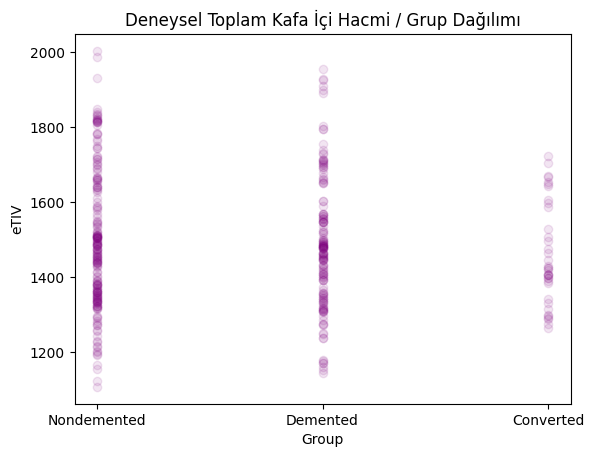

In [76]:
plt.scatter(oasis["Group"], oasis["eTIV"], color="purple", alpha= 0.1)
plt.title("Deneysel Toplam Kafa İçi Hacmi / Grup Dağılımı")
plt.xlabel('Group')
plt.ylabel('eTIV')
plt.show()

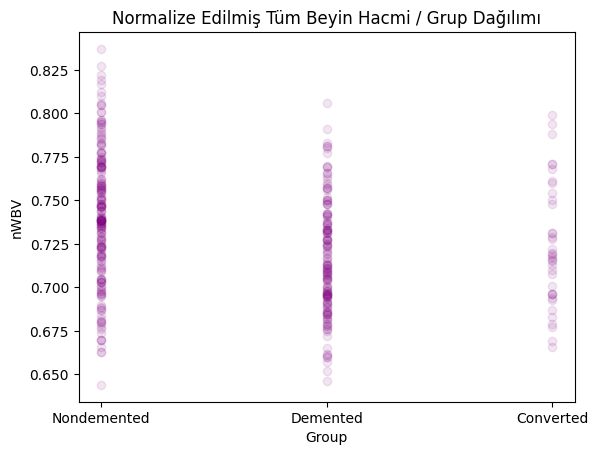

In [77]:
plt.scatter(oasis["Group"], oasis["nWBV"], color="purple", alpha= 0.1)
plt.title("Normalize Edilmiş Tüm Beyin Hacmi / Grup Dağılımı")
plt.xlabel('Group')
plt.ylabel('nWBV')
plt.show()

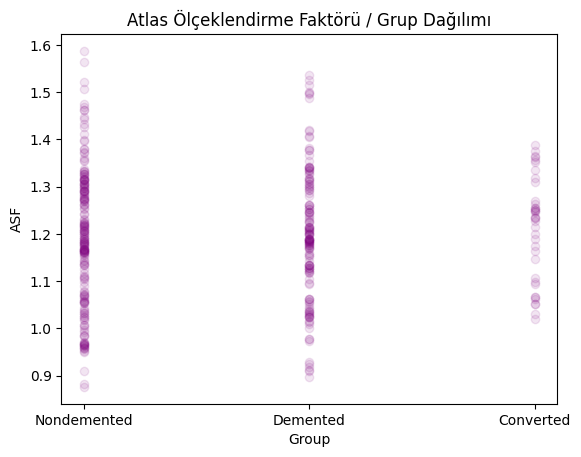

In [78]:
plt.scatter(oasis["Group"], oasis["ASF"], color="purple", alpha= 0.1)
plt.title("Atlas Ölçeklendirme Faktörü / Grup Dağılımı")
plt.xlabel('Group')
plt.ylabel('ASF')
plt.show()

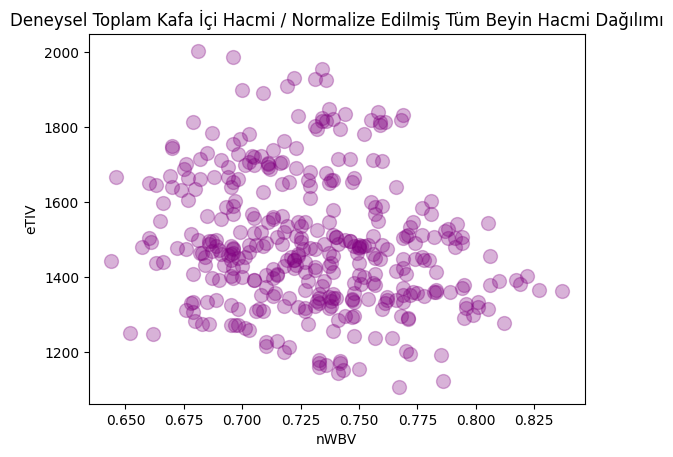

In [79]:
plt.scatter(oasis["nWBV"], oasis["eTIV"], color="purple", alpha= 0.3, s= 100)
plt.title("Deneysel Toplam Kafa İçi Hacmi / Normalize Edilmiş Tüm Beyin Hacmi Dağılımı")
plt.xlabel('nWBV')
plt.ylabel('eTIV')
plt.show()

# Makine Öğrenmesi

In [131]:
from sklearn.model_selection import train_test_split # train_test_split() kullanabilmek için
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [132]:
# Veri setini yükleme
oasis = pd.read_csv("oasis.csv")

In [133]:
# Kategorik değişkenleri encoding (Metin verileri sayısal verilere dönüştürme)
le = LabelEncoder()
oasis['Group'] = le.fit_transform(oasis['Group'])
oasis['M/F'] = le.fit_transform(oasis['M/F'])
oasis['Hand'] = le.fit_transform(oasis['Hand']) # Az Önemli Veri

In [134]:
print(oasis.columns)

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')


In [135]:
# Bağımsız değişkenleri ve hedef değişkeni seçme
# Subject ID ve MRI ID önemli olmadığından çıkarıldı. Hand hep değerleri aynı olduğundan çıkarıldı
# Geriye kalan sütunlar X(Bağımsız Değişkenler) değişkene atandı
# axis=1: Sütunları hedef aldığını belirtir (satırları kaldırmak için axis=0 kullanılır)
X = oasis.drop(['Subject ID', 'MRI ID', 'Hand', 'Group', 'Visit'], axis=1)
y = oasis['Group'] # Group stünu Y(Hedef Değişken) değişkenine atandı

In [136]:
# Veriyi %80 eğitim, %20 test olarak ayırma (test_size=0.2)
# X_train: Eğitim için kullanılacak bağımsız değişkenler.
# X_test : Test için kullanılacak bağımsız değişkenler.
# y_train: Eğitim için kullanılacak hedef değişken.
# y_test : Test için kullanılacak hedef değişken.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
# Random Forest modelini oluşturma ve eğitme

# Model Oluşturma
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators=100, 100 adet oluşturulan karar ağacı
# Model Eğitme
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [138]:
# test verileri (X_test) için sınıflandırma tahminleri yapma
y_pred = rf_classifier.predict(X_test)

In [139]:
# Model performansını değerlendirme
print("Model Doğruluğu (Accuracy):", accuracy_score(y_test, y_pred))
print("\nKarışıklık Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
print("\nSınıflandırma Raporu (Classification Report):\n", classification_report(y_test, y_pred))

Model Doğruluğu (Accuracy): 0.8666666666666667

Karışıklık Matrisi (Confusion Matrix):
 [[ 3  1  7]
 [ 1 31  0]
 [ 0  1 31]]

Sınıflandırma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.75      0.27      0.40        11
           1       0.94      0.97      0.95        32
           2       0.82      0.97      0.89        32

    accuracy                           0.87        75
   macro avg       0.84      0.74      0.75        75
weighted avg       0.86      0.87      0.84        75



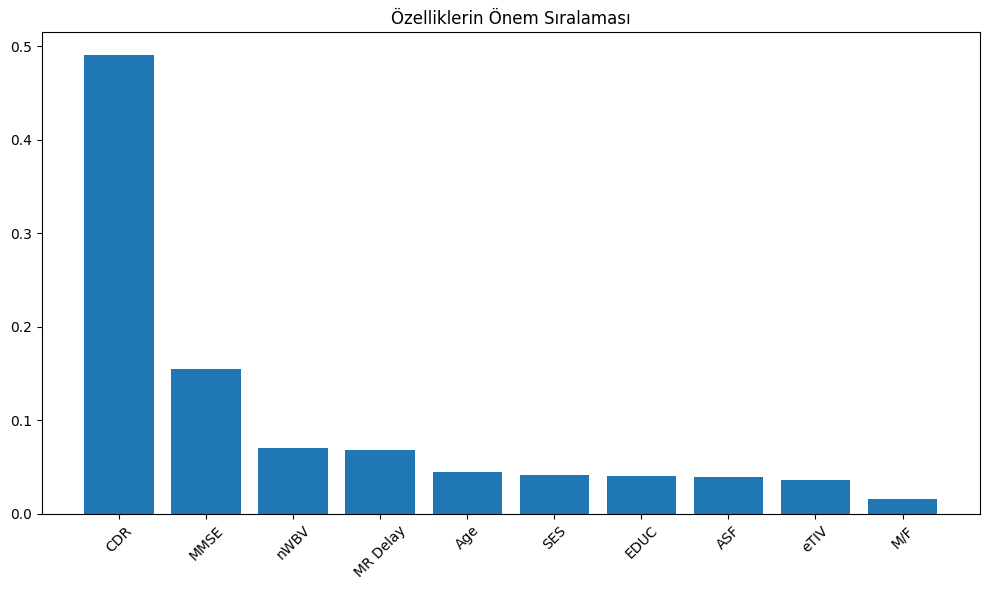

In [140]:
# Özellik önemini görselleştirme
plt.figure(figsize=(10, 6))
feature_importance = rf_classifier.feature_importances_
feature_names = X.columns
indices = np.argsort(feature_importance)[::-1]

plt.title("Özelliklerin Önem Sıralaması")
plt.bar(range(X.shape[1]), feature_importance[indices])
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

In [141]:
# Özellik önem tablosu
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)
print("\nÖzellik Önem Tablosu:\n", feature_importance_df)


Özellik Önem Tablosu:
     feature  importance
6       CDR    0.490143
5      MMSE    0.155002
8      nWBV    0.070220
0  MR Delay    0.068281
2       Age    0.044463
4       SES    0.041207
3      EDUC    0.040378
9       ASF    0.039282
7      eTIV    0.035582
1       M/F    0.015442


# Performans Değerlendirme

## Doğruluk Skoru

In [142]:
# Test verilerindeki doğru tahminlerin toplam tahminlere oranıdır (Doğru Tahmin Sayısı / Toplam Tahmin Sayısı)
accuracy = accuracy_score(y_test, y_pred)
print("Model Doğruluğu:", accuracy)

Model Doğruluğu: 0.8666666666666667


## Karışıklık Matrisi (Confusion Matrix)

In [143]:
# Bu matris, modelin tahminlerinin gerçek değerlerle nasıl uyuştuğunu gösterir.
# Satırlar: Gerçek sınıflar
# Sütunlar: Tahmin edilen sınıflar
cm = confusion_matrix(y_test, y_pred)
print("Karışıklık Matrisi:\n", cm)

Karışıklık Matrisi:
 [[ 3  1  7]
 [ 1 31  0]
 [ 0  1 31]]


### Karışıklık Matrisinin Yorumu

In [151]:
# Gerçek Sınıf	  Tahmin Sınıf 0	  Tahmin Sınıf 1	  Tahmin Sınıf 2	  Toplam
#    0	            3 (doğru)	        1 (yanlış)	        7 (yanlış)	        11
#    1	            1 (yanlış)	       31 (doğru)	        0 (yanlış)	        32
#    2	            0 (yanlış)	        1 (yanlış)	       31 (doğru)	        32

#   Sınıf 0 (11 örnek):
#      Model, sadece 3 tanesini doğru tahmin etmiş, 8'ini yanlış sınıflandırmış
#   Sınıf 1 (32 örnek):
#      31 örneği doğru, sadece 1 tanesi yanlış
#   Sınıf 2 (32 örnek):
#      31 örneği doğru, sadece 1 tanesi yanlış

### Karışıklık Matrisini Görselleştirme

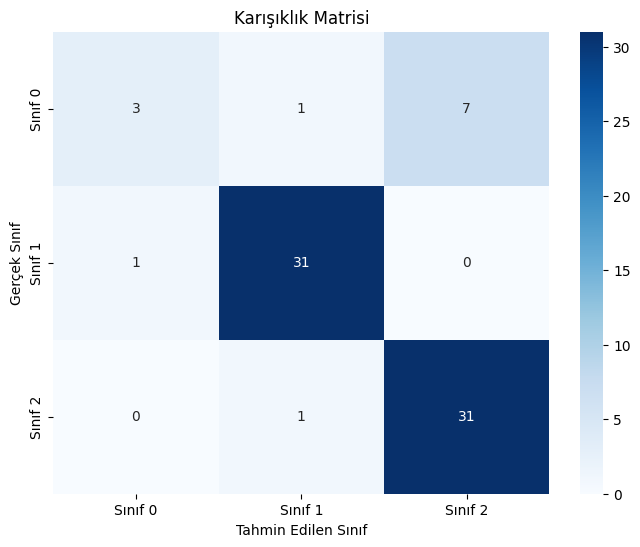

In [152]:
# Karışıklık Matrisini Hesapla
cm = confusion_matrix(y_test, y_pred)

# Karışıklık Matrisini Görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'], yticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'])
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Karışıklık Matrisi")
plt.show()

## Sınıflandırma Raporu

In [153]:
# Precision (Kesinlik): Tahmin edilen sınıfa ait örneklerin ne kadarının doğru olduğunu ölçer.
# Recall (Duyarlılık) : Gerçek sınıfa ait örneklerin ne kadarının doğru tahmin edildiğini ölçer.
# F1-Score            : Precision ve Recall'un harmonik ortalamasıdır.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.27      0.40        11
           1       0.94      0.97      0.95        32
           2       0.82      0.97      0.89        32

    accuracy                           0.87        75
   macro avg       0.84      0.74      0.75        75
weighted avg       0.86      0.87      0.84        75



### Sınıflandırma Raporunun Yorumu

In [154]:
#   Sınıf 0:
#      Precision: 0.75 (Modelin "0" dediği örneklerin %75'i doğru)
#      Recall   : 0.27 (Gerçek "0" örneklerinin sadece %27'si doğru tahmin edilmiş)
#      F1-Score : 0.40 (Düşük performans)

#   Sınıf 1:
#      Precision: 0.94 (Modelin "1" dediği örneklerin %94'ü doğru)
#      Recall   : 0.97 (Gerçek "1" örneklerinin %97'si doğru tahmin edilmiş)
#      F1-Score : 0.95 (Çok iyi performans)

#   Sınıf 2:
#      Precision: 0.82 (Modelin "2" dediği örneklerin %82'si doğru)
#      Recall   : 0.97 (Gerçek "2" örneklerinin %97'si doğru tahmin edilmiş)
#      F1-Score : 0.89 (İyi performans)

### Sınıflandırma Raporunu Görselleştirme

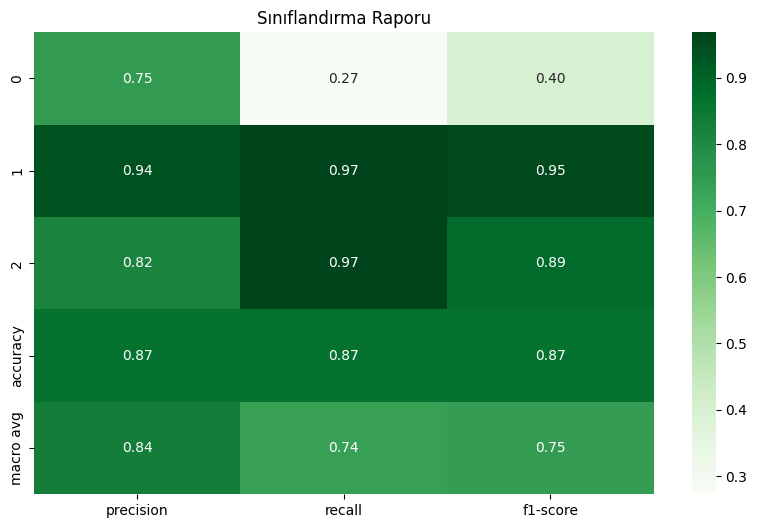

In [157]:
# Sınıflandırma Raporunu Al
report = classification_report(y_test, y_pred, output_dict=True)

# Raporu DataFrame'e Dönüştür
report_df = pd.DataFrame(report).transpose()

# Görselleştir
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("Sınıflandırma Raporu")
plt.show()